In [127]:
import csv
import numpy as np
from scipy import stats
import math
from numpy.linalg import inv, norm, pinv
import random
# I found it difficult ot de compress it in jupyter so I used Linux convert them into csv files
Tr = np.loadtxt(open("C:\\Users\\grbag\\Desktop\\Fall17\\my machine learning\\KNN\\data\\mnist_train.csv", "rb"), delimiter=",")
# Tx = np.loadtxt(open("C:\\Users\\grbag\\Desktop\\Fall17\\my machine learning\\KNN\\data\\mnist_test.csv", "rb"), delimiter=",")

TrD = Tr[:5000,1:]              # Training data
TrL = Tr[:5000,0]               # Training Labels
# TxD = Tx[:,1:]              # Testing data
# TxL = Tx[:,0]               # Testing Labels
        

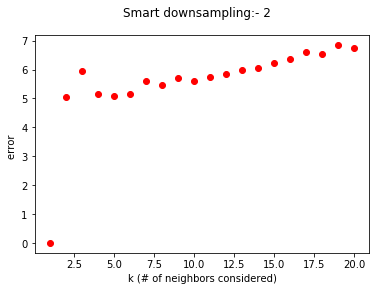

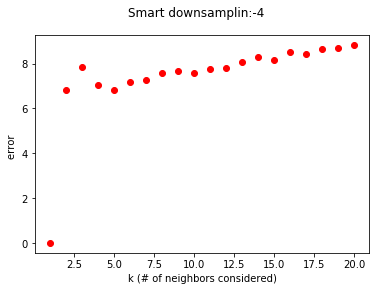

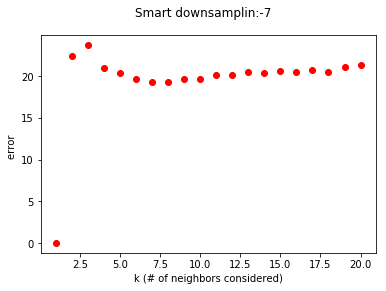

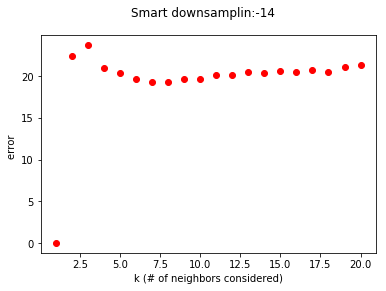

In [128]:
from scipy.stats import mode

# downsampling function 
# The image in the data is flattened to a single list which is slighlty diff to smart downsample
# THus, the image, every row, is comverted to an array which is sampled and converted back to 
# list for further processing.

def dwnsamplr(intTr,N):
    import numpy as np
    c=intTr.shape[1]
    r=intTr.shape[0]
    nmax = int(28/N)
    temp2=np.zeros((1,(nmax*nmax)))
    for h in range(0,r):
        temp=intTr[h,:]
        img=np.array(temp)  # list to array 
        img.shape=(28,28)
        a= np.zeros((nmax, nmax))
        for i in range(0,nmax):
            for j in range(0,nmax):
                ii=i*N
                jj=j*N
                a[i,j]= int(sum(sum(img[ii:(ii+N),jj:(jj+N)])))  # images as selected and summed to for a single pixel
        b=a.flatten()
        b.shape=(1,(nmax*nmax))
        temp2=np.vstack((temp2,b))
        out=temp2[1:,:]
    return out  

Trd4s =dwnsamplr(TrD,4)
Trd2s =dwnsamplr(TrD,2)         #downsample by the factor of k =4,2,7,14
Trd7s =dwnsamplr(TrD,7)
Trd14s =dwnsamplr(TrD,14)

k=[]
calc = 1
while int(calc) < 21:
    k.append(calc)
    calc = int(calc) + 1     # k from 1 to 20

def prednn(Train,Test,k):
    imax = Train.shape[0]
    errork = np.zeros((20, 1))
    for kk in k[:19]:
        pred= np.zeros((TrD.shape[0], 1))
        for i in range(0,Train.shape[0]):
            tstimage=Train[i,:]   # temp image
            Distance_matrix = np.einsum('ij, ij->i', (Train-tstimage), (Train-tstimage))
            nearestks = Test[np.argsort(Distance_matrix)[1:(kk+1)]]  
            pred[i] = mode(nearestks)[0][0]
            crtpred= np.zeros((pred.shape[0], 1))  # intialize correct predictions array  
            for cnter in range(0,pred.shape[0]): 
                crtpred[cnter]=pred[cnter]==Test[cnter]     # if prediction was correct
        cpsum = np.sum(crtpred) #correct predection sum
        p = cpsum*100/imax      # Accuracy    
        errork[kk]=100-p;
        del pred
    return errork
err2s=prednn(Trd2s,TrL,k);
fig=plt.figure()
plt.plot(k,(err2s), 'ro',figure=fig)
fig.suptitle("Smart downsampling:- 2")
fig.axes[0].set_xlabel("k (# of neighbors considered)")
fig.axes[0].set_ylabel("error ");
err4s=prednn(Trd4s,TrL,k)
fig=plt.figure()
plt.plot(k,err4s, 'ro',figure=fig)
fig.suptitle("Smart downsamplin:-4")
fig.axes[0].set_xlabel("k (# of neighbors considered)")
fig.axes[0].set_ylabel("error ");


err7s=prednn(Trd7s,TrL,k)
fig=plt.figure()
plt.plot(k,err7s, 'ro',figure=fig)
fig.suptitle("Smart downsamplin:-7")
fig.axes[0].set_xlabel("k (# of neighbors considered)")
fig.axes[0].set_ylabel("error ");


err14s=prednn(Trd14s,TrL,k)
fig=plt.figure()
plt.plot(k,err7s, 'ro',figure=fig)
fig.suptitle("Smart downsamplin:-14")
fig.axes[0].set_xlabel("k (# of neighbors considered)")
fig.axes[0].set_ylabel("error ");



In [ ]:
# smart downsampling performs better than normal downsampling
# done in the earlier section. The error shown are in percentages meaning for example downsampling of 14 and k= 3
# the error was about 25 percent
# as the downsampling increase the error predection precsion also reduces as the some error during downsampling is created

